# Daily Aggregation of Data

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

sc = SparkContext('local')
spark = SparkSession(sc)

## Initial Aggregation and Visual Exploration

2004 seems to be the trickiest year to aggregate given the fact that the reporting of the data is the most un-uniform over the three years.

In [4]:
%matplotlib inline
import matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2004 Meteorlogical Data Exploration - Preparing Data

In [5]:
met04_df = meteor04_df.toPandas()
met04_df_naomit = met04_df.replace(-99999, None).drop(met04_df.columns[0], axis = 1).dropna(axis = 0)
met04_df_naomit["date"] = met04_df_naomit["SMPLDATE"]
met04_df_naomit = met04_df_naomit.drop(["SMPLDATE", "SMPLTIME"], axis = 1)

In [6]:
met04_df_naomit = met04_df_naomit[met04_df_naomit.CLASS == "15"]
met04_df_naomit = met04_df_naomit.set_index('date')

In [7]:
met04_df_naomit = met04_df_naomit.groupby(level=0).mean()

In [8]:
met04_df_naomit.describe()

,ATemp,MaxTemp,MaxTempT,MinTemp,MinTempT,RH,MaxRH,MaxRHT,MinRH,MinRHT,...,WSpd,Wdir,SDWDir,MaxWSpd,MaxWSpdT,MinWSpd,MinWSpdT,TotPrcp,TotPAR,AvgVolt
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,18.955947,19.239701,1178.002019,18.677407,1178.965132,74.065628,75.586860,1179.187169,72.669261,1178.006151,...,1.575044,170.341516,18.944212,3.214770,1177.760622,0.501274,1175.622784,0.023357,295.596724,12.976412
std,7.709046,7.708489,40.062537,7.706734,40.100925,10.966414,10.501567,40.335737,11.337303,38.611099,...,0.871816,73.489375,3.725846,1.544413,39.988970,0.355029,39.974720,0.076255,125.464283,0.089521
min,-0.152083,0.130208,604.080000,-0.442708,603.500000,29.312500,32.010417,602.960000,27.229167,606.120000,...,0.265625,19.031250,9.927083,0.642708,604.100000,0.200000,603.360000,0.000000,31.670833,12.738542
25%,12.539323,12.805729,1178.044271,12.294010,1178.674479,68.317708,70.408854,1179.622396,66.804688,1178.062500,...,0.927604,117.153646,16.411458,2.085156,1177.424479,0.236198,1174.419271,0.000000,207.951302,12.910417
50%,20.268229,20.504167,1178.479167,20.020312,1179.239583,75.338542,77.062500,1180.197917,73.937500,1178.697917,...,1.370833,183.796875,18.500000,2.869271,1178.333333,0.377604,1175.765625,0.000000,293.283854,12.963542
75%,25.771615,26.044271,1178.908854,25.449219,1179.825521,82.494792,83.531250,1180.804688,81.388021,1179.312500,...,2.054427,223.617188,21.473958,4.116406,1178.906250,0.649479,1177.335938,0.000000,401.810156,13.037760
max,31.202083,31.473958,1678.696429,30.937500,1680.589286,94.645833,94.802083,1680.107143,94.416667,1636.535714,...,4.676042,314.333333,31.885417,8.357292,1677.464286,2.135417,1676.500000,0.737500,534.487500,13.258929


## 2005 Meteorlogical Data Exploration - Preparing Data

In [9]:
met05_df = meteor05_df.toPandas()
met05_df_naomit = met05_df.replace(-99999, None).dropna(axis = 0).drop([met05_df.columns[0],met05_df.columns[-2],met05_df.columns[-1]], axis = 1)

In [10]:
met05_df_naomit.describe()

,CLASS,ATemp,MaxTemp,MaxTempT,MinTemp,MinTempT,RH,MaxRH,MaxRHT,MinRH,...,WSpd,Wdir,SDWDir,MaxWSpd,MaxWSpdT,MinWSpd,MinWSpdT,TotPrcp,TotPAR,AvgVolt
count,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,...,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000,41940.000000
mean,24.934406,18.183903,18.501133,1176.231354,17.872198,1172.895184,77.817525,79.999404,1174.016595,75.637673,...,3.485889,185.889390,13.027563,5.405923,1176.582332,1.856247,1172.112351,0.109962,500.701731,12.825923
std,20.829939,8.171710,8.178775,690.654170,8.187909,694.967631,17.700369,16.528509,694.997281,18.886193,...,2.173616,111.321604,9.208636,3.228948,691.481588,1.424442,694.305922,1.553218,2062.393995,0.328344
min,15.000000,-7.000000,-6.900000,0.000000,-7.100000,0.000000,15.000000,18.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.100000,12.100000
25%,15.000000,11.900000,12.300000,559.000000,11.600000,555.000000,68.000000,70.000000,557.000000,64.000000,...,1.900000,75.000000,8.000000,3.000000,559.000000,0.800000,553.000000,0.000000,0.000000,12.600000
50%,15.000000,19.200000,19.500000,1200.000000,18.900000,1149.000000,82.000000,84.000000,1153.000000,80.000000,...,3.200000,207.000000,11.000000,5.000000,1158.500000,1.600000,1154.000000,0.000000,13.350000,12.700000
75%,15.000000,25.200000,25.500000,1752.000000,24.900000,1759.000000,92.000000,93.000000,1759.000000,91.000000,...,4.800000,281.000000,14.000000,7.300000,1756.000000,2.600000,1757.000000,0.000000,470.300000,13.100000
max,144.000000,36.700000,36.900000,2359.000000,36.500000,2359.000000,103.000000,103.000000,2359.000000,103.000000,...,16.600000,360.000000,102.000000,22.400000,2359.000000,11.600000,2359.000000,135.900000,36657.000000,13.800000


In [11]:
met05_df_naomit["date"] = met05_df_naomit["SMPLDATE"]
met05_df_naomit = met05_df_naomit.drop(["SMPLDATE", "SMPLTIME", "STNCODE"], axis = 1)
met05_df_naomit = met05_df_naomit[met05_df_naomit.CLASS == 15]
#15, 60, 144
#15 min, 60 min, 144 daily 

In [12]:
met05_df_naomit = met05_df_naomit.set_index('date')
met05_df_naomit = met05_df_naomit.groupby(level=0).mean().drop("CLASS", axis = 1)

In [13]:
met05_df_naomit

,ATemp,MaxTemp,MaxTempT,MinTemp,MinTempT,RH,MaxRH,MaxRHT,MinRH,MinRHT,...,WSpd,Wdir,SDWDir,MaxWSpd,MaxWSpdT,MinWSpd,MinWSpdT,TotPrcp,TotPAR,AvgVolt
date,,,,,,,,,,,,,,,,,,,,,
01/01/2005,12.746875,13.067708,1179.312500,12.452083,1182.135417,85.593750,86.750000,1181.270833,84.364583,1178.760417,...,0.382292,243.354167,12.020833,0.740625,1174.364583,0.231250,1173.125000,0.0,161.217708,12.843750
01/02/2005,12.308333,12.525000,1179.458333,12.105208,1155.614583,86.864583,87.812500,1180.062500,85.947917,1179.812500,...,0.880208,190.708333,11.239583,1.160417,1174.218750,0.633333,1173.729167,0.0,127.839583,12.810417
01/03/2005,12.425000,12.739583,1181.020833,12.139583,1181.437500,88.177083,88.947917,1180.135417,87.229167,1178.114583,...,0.630208,207.906250,11.406250,0.970833,1174.333333,0.421875,1173.656250,0.0,201.858333,12.783333
01/04/2005,15.272917,15.529167,1180.031250,15.034375,1180.770833,87.145833,88.104167,1179.937500,86.322917,1179.333333,...,1.542708,248.229167,11.187500,2.525000,1176.635417,0.719792,1175.958333,0.0,198.222917,12.797917
01/05/2005,16.775000,16.942708,1179.739583,16.601042,1180.010417,87.927083,88.812500,1181.062500,87.010417,1178.770833,...,2.658333,224.572917,10.333333,4.034375,1177.208333,1.519792,1177.604167,0.0,196.104167,12.772917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/21/2005,4.131461,4.361798,1189.977528,3.897753,1193.662921,44.966292,47.955056,1192.865169,42.707865,1191.752809,...,2.789888,168.426966,11.955056,4.330337,1192.404494,1.483146,1191.898876,0.0,116.287640,12.758427
12/22/2005,2.736458,3.072917,1179.437500,2.404167,1179.500000,57.781250,61.437500,1179.958333,54.437500,1179.958333,...,2.237500,226.510417,10.833333,3.316667,1180.125000,1.208333,1179.375000,0.0,125.477083,12.650000
12/23/2005,4.587500,4.933333,1179.708333,4.218750,1179.229167,66.250000,68.989583,1179.895833,63.552083,1180.437500,...,1.644792,270.020833,13.229167,2.575000,1179.916667,0.782292,1179.177083,0.0,141.975000,12.678125


## 06 Meteorlogical Data Exploration - Preparing Data

In [14]:
met06_df = meteor06_df.toPandas()
met06_df_naomit = met06_df.drop(["DnIrrad"], axis = 1).dropna(axis = 0)

In [15]:
met06_df_naomit.describe()

,_c0,CLASS,ATemp,MaxTemp,MaxTempT,MinTemp,MinTempT,RH,MaxRH,MaxRHT,...,WSpd,Wdir,SDWDir,MaxWSpd,MaxWSpdT,MinWSpd,MinWSpdT,TotPrcp,TotPAR,AvgVolt
count,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,...,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000,716638.000000
mean,411107.108151,22.970363,14.450170,14.833952,1179.347830,13.981914,1177.006057,74.740597,77.086441,1177.373190,...,2.350733,185.660304,22.468433,4.314907,1179.056305,0.925116,1171.929019,0.062604,629.587630,13.037416
std,255902.115369,19.124680,9.447441,9.535975,689.144323,9.291191,694.763402,18.422882,17.123241,694.315545,...,1.935628,102.315331,15.663144,2.954606,690.760113,1.258191,694.500643,0.888193,2822.933019,0.414787
min,0.000000,15.000000,-16.700000,-16.600000,0.000000,-16.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.200000,8.900000
25%,188380.250000,15.000000,7.800000,8.100000,600.000000,7.400000,558.000000,63.000000,66.000000,559.000000,...,0.900000,101.000000,12.000000,2.000000,600.000000,0.200000,554.000000,0.000000,0.000000,12.700000
50%,401023.500000,15.000000,14.300000,14.700000,1200.000000,14.000000,1157.000000,78.000000,80.000000,1157.000000,...,1.900000,192.000000,18.000000,3.800000,1200.000000,0.400000,1155.000000,0.000000,17.800000,13.000000
75%,611601.750000,15.000000,22.200000,22.500000,1755.000000,21.500000,1759.000000,90.000000,91.000000,1759.000000,...,3.300000,270.000000,28.000000,5.900000,1757.000000,1.300000,1757.000000,0.000000,588.500000,13.400000
max,901318.000000,144.000000,39.500000,73.500000,2359.000000,39.100000,2359.000000,102.000000,102.000000,2359.000000,...,19.100000,360.000000,104.000000,38.500000,2359.000000,14.700000,2359.000000,155.700000,98043.000000,14.500000


In [16]:
met06_df_naomit["date"] = met06_df_naomit["SMPLDATE"]
met06_df_naomit = met06_df_naomit.drop(["_c0","SMPLDATE", "SMPLTIME", "STNCODE"], axis = 1)
met06_df_naomit = met06_df_naomit[met06_df_naomit.CLASS == 15]
met06_df_naomit = met06_df_naomit.set_index('date')
met06_df_naomit = met06_df_naomit.groupby(level=0).mean().drop("CLASS", axis = 1)

In [17]:
met06_df_naomit.describe()

,ATemp,MaxTemp,MaxTempT,MinTemp,MinTempT,RH,MaxRH,MaxRHT,MinRH,MinRHT,...,WSpd,Wdir,SDWDir,MaxWSpd,MaxWSpdT,MinWSpd,MinWSpdT,TotPrcp,TotPAR,AvgVolt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,14.462577,14.764607,1178.679647,14.050237,1178.192820,75.196204,77.290758,1178.325864,73.273739,1178.541014,...,2.306930,184.097073,21.487823,4.122396,1178.398077,0.943812,1177.785313,0.031670,285.721884,13.022569
std,6.522852,6.563670,8.557921,6.362241,8.838989,7.381045,6.821328,8.666380,7.574382,8.728133,...,0.547590,25.207022,2.044719,0.919942,8.632707,0.289879,8.564757,0.039126,120.375081,0.074994
min,1.492625,1.733964,1134.784064,1.256526,1134.548207,52.301042,55.203646,1138.194969,49.699479,1133.369497,...,1.260746,103.261376,15.469363,2.438651,1132.475697,0.413816,1134.171315,0.000000,47.890972,12.837600
25%,8.482768,8.751906,1177.694444,8.225849,1177.578704,70.296122,72.757463,1177.267708,68.029874,1177.647028,...,1.892357,165.633462,19.943424,3.443679,1177.611765,0.727389,1177.156250,0.007448,181.685729,12.963557
50%,14.707760,14.953667,1179.145313,14.428854,1179.004688,76.265763,78.202870,1178.987689,74.435689,1179.185417,...,2.220796,183.486712,21.376984,3.922392,1179.049603,0.890078,1178.400219,0.017500,289.845804,13.011470
75%,20.748517,21.090573,1181.129599,20.041463,1180.575600,80.598147,82.390899,1180.486674,78.517038,1181.044747,...,2.655990,199.750121,22.929167,4.707766,1180.500782,1.133400,1179.947917,0.042660,388.134508,13.079167
max,27.409452,27.762777,1210.071035,26.734289,1214.381506,90.291667,91.078125,1209.184323,89.565625,1211.756277,...,4.143744,256.166749,27.291667,7.460616,1212.374770,1.876709,1210.629516,0.239472,533.365659,13.202392


In [18]:
met04_df_naomit.to_csv(clean_path + "DAvg_meteor04.csv")
met05_df_naomit.to_csv(clean_path + "DAvg_meteor05.csv")
met06_df_naomit.to_csv(clean_path + "DAvg_meteor06.csv")

## 04-06 Water Quality Data


In [19]:
water04_df = spark.read.csv(clean_path + "NOAA_water_data_2004.csv",header=True, inferSchema=True)
water05_df = spark.read.csv(clean_path + "NOAA_water_data_2005.csv",header=True, inferSchema=True)
water06_df = spark.read.csv(clean_path + "NOAA_water_data_2006.csv",header=True, inferSchema=True)
water04_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- STNCODE: string (nullable = true)
 |-- SMPLDATE: string (nullable = true)
 |-- USRCODES: string (nullable = true)
 |-- SMPLTIME: string (nullable = true)
 |-- Temp: string (nullable = true)
 |-- SpCond: string (nullable = true)
 |-- Sal: string (nullable = true)
 |-- DO_pct: string (nullable = true)
 |-- DO_mgl: string (nullable = true)
 |-- Depth: string (nullable = true)
 |-- pH: string (nullable = true)
 |-- Turb: string (nullable = true)



In [20]:
water04_df = water04_df.toPandas()
water05_df = water05_df.toPandas()
water06_df = water06_df.toPandas()

In [21]:
#water04_df.printSchema()

AttributeError: 'DataFrame' object has no attribute 'printSchema'

In [32]:
water04_df_naomit = water04_df.dropna(axis = 0)
water04_df_naomit["date"] = water04_df_naomit["SMPLDATE"]
water04_df_naomit = water04_df_naomit.drop(["_c0","SMPLDATE", "SMPLTIME", "STNCODE", "USRCODES","SpCond","Sal","DO_pct","DO_mgl","Depth","pH","Turb"], axis = 1)
water04_df_naomit = water04_df_naomit.set_index('date')
water04_df_naomit["Temp"] = water04_df_naomit.Temp.astype(float)
water04_df_naomit = water04_df_naomit.groupby(level=0).mean()

/home/brendanliu/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
water04_df_naomit

In [37]:
water05_df_naomit = water05_df.dropna(axis = 0)
water05_df_naomit["date"] = water05_df_naomit["SMPLDATE"]
water05_df_naomit = water05_df_naomit.drop(["_c0","SMPLDATE", "SMPLTIME", "STNCODE", "USRCODES","SpCond","Sal","DO_pct","DO_mgl","Depth","pH","Turb"], axis = 1)
water05_df_naomit = water05_df_naomit.set_index('date')
water05_df_naomit["Temp"] = water05_df_naomit.Temp.astype(float)
water05_df_naomit = water05_df_naomit.groupby(level=0).mean()

/home/brendanliu/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
water05_df_naomit

,Temp
date,
01/01/2005,9.897469
01/02/2005,10.287609
01/03/2005,10.711473
01/04/2005,11.380569
01/05/2005,11.434863
...,...
12/27/2005,10.069058
12/28/2005,10.349375
12/29/2005,10.666942


In [39]:
water06_df_naomit = water06_df.dropna(axis = 0)
water06_df_naomit["date"] = water06_df_naomit["SMPLDATE"]
water06_df_naomit = water06_df_naomit.drop(["_c0","SMPLDATE", "SMPLTIME", "STNCODE", "USRCODES","SpCond","Sal","DO_pct","DO_mgl","Depth","pH","Turb"], axis = 1)
water06_df_naomit = water06_df_naomit.set_index('date')
water06_df_naomit["Temp"] = water06_df_naomit.Temp.astype(float)
water06_df_naomit = water06_df_naomit.groupby(level=0).mean()

/home/brendanliu/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
water04_df_naomit.to_csv('./input/clean/agg/DAvg_wat04.csv')
water05_df_naomit.to_csv('./input/clean/agg/DAvg_wat05.csv')
water06_df_naomit.to_csv('./input/clean/agg/DAvg_wat06.csv')

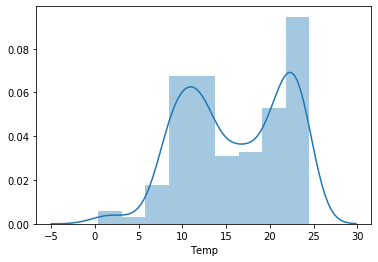

In [48]:
sns.distplot(water04_df_naomit.Temp)

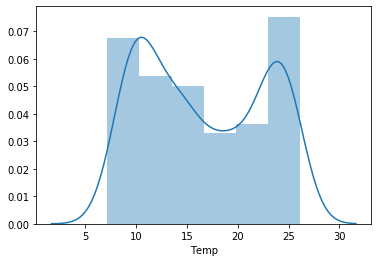

In [49]:
sns.distplot(water05_df_naomit.Temp)

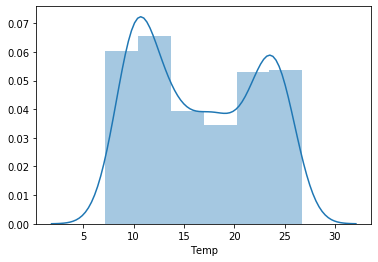

In [50]:
sns.distplot(water06_df_naomit.Temp)